In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [457]:
df=pd.read_csv('temperature.csv')
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [458]:
df.shape

(7752, 25)

The dataset has 7752 rows and 25 columns

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


The columns lat,lon,DEM,Slope and Solar radiation has 7752 non-null values all other columns has some null values.

All columns are of float data type except data column.

In [460]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Date is object type need to convert to datetime.

In [461]:
#Coverting Date to timedate
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)

In [462]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin   Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2  30.0   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5  30.0   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9  30.0   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3  30.0   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5  30.0   

   Month    Year  
0    6.0  2013.0  
1    6.0  2013.0  
2    6.0  2013.0  
3    6.0  2013.0  
4    6.0  2013.0  

[5 rows x 28 columns]

In [463]:
#Removing Date
df=df.drop('Date',axis=1)

In [464]:
#Checking the null values
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

In [465]:
#Dropping null values
df=df.dropna()

In [466]:
#Checking the shape of dataframe
df.shape

(7588, 27)

Now the data set have 7588 rows and 27 columns.

In [467]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

<AxesSubplot:>

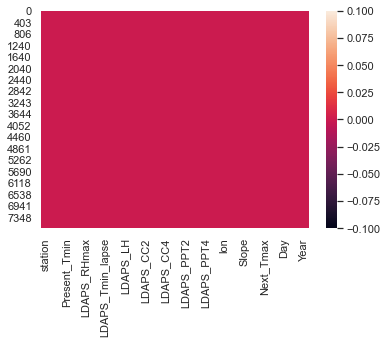

In [468]:
sns.heatmap(df.isnull())

No null value present.

In [436]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   
Day              -0.000996     -0.154366     -0.115693    -0.063464   
Month             0.001211     -0.003266     -0.010210    -0.053499   
Year              0.001474      0.056002      0.037457    -0.002147   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.886513 -0.102021   
Day                 -0.012226         -0.161320        

<AxesSubplot:>

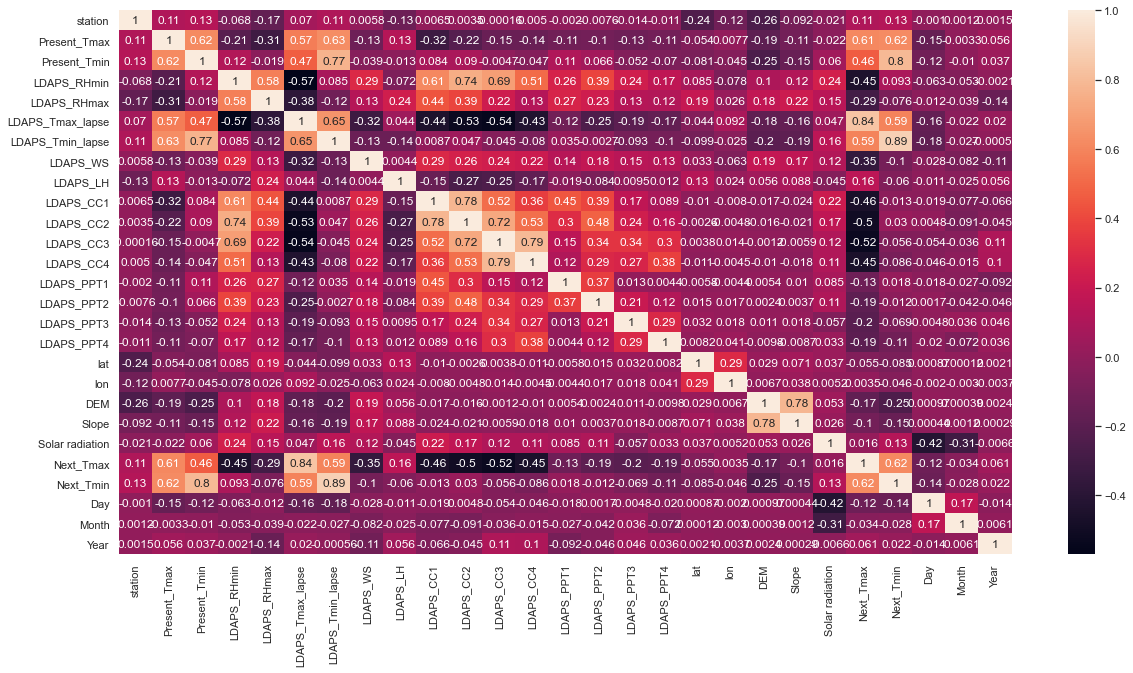

In [408]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Next_Tmax and Next_Tmin is highly correlated to Present_Tmax.

LDAPS_Tmin_lapse and Next_Tmin is highly correlated to Present_Tmin.

LDAPS_CC1,LDAPS_CC2 and LDAPS_CC3 highly correlated to LDAPS_RHmin.

Next_Tmax and Next_Tmin is highly correlated to LDAPS_Tmax_lapse.

LDAPS_CC1,LDAPS_CC2 and LDAPS_CC3 are correlated to each other.

Slope and DEM correlated to each other.

Netx_Tmin and Next_Tmax correlated to each others

In [356]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820    16.337375     7.068134   
std         429.782561     3.111807     2.482256     8.216880     2.242389   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        5001.485717    28.200000    21.300000     8.000000     7.000000   
50%        5441.987305    30.400000    23.100000    16.000000     7.000000   
75%        5729.485840    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

# Data Visualization

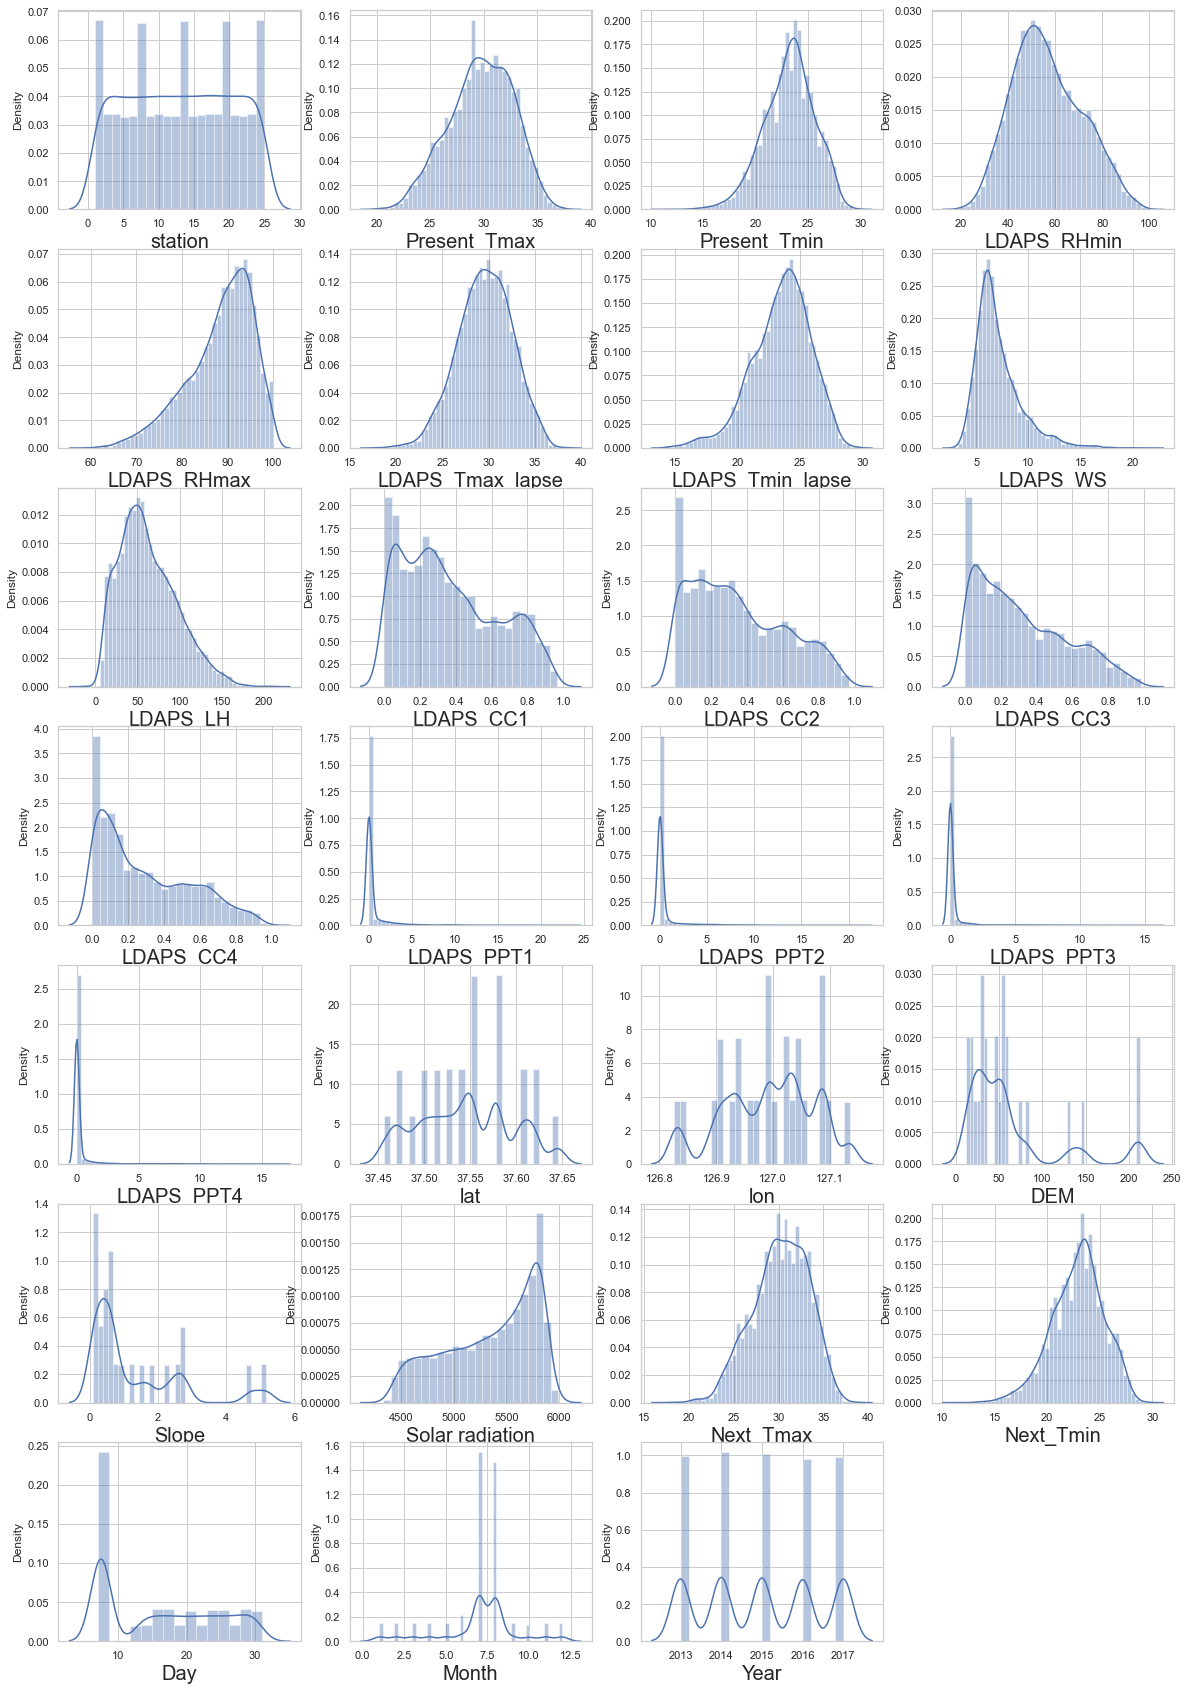

In [357]:
plt.figure(figsize=(20,30))
plotnumber=1

for i in df.columns:
    if plotnumber<=27:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [358]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
dtype: float64

Skewness is present in LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4.

In [469]:
#Removing skewness
df['LDAPS_PPT1']=np.sqrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']=np.sqrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3']=np.sqrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']=np.sqrt(df['LDAPS_PPT4'])

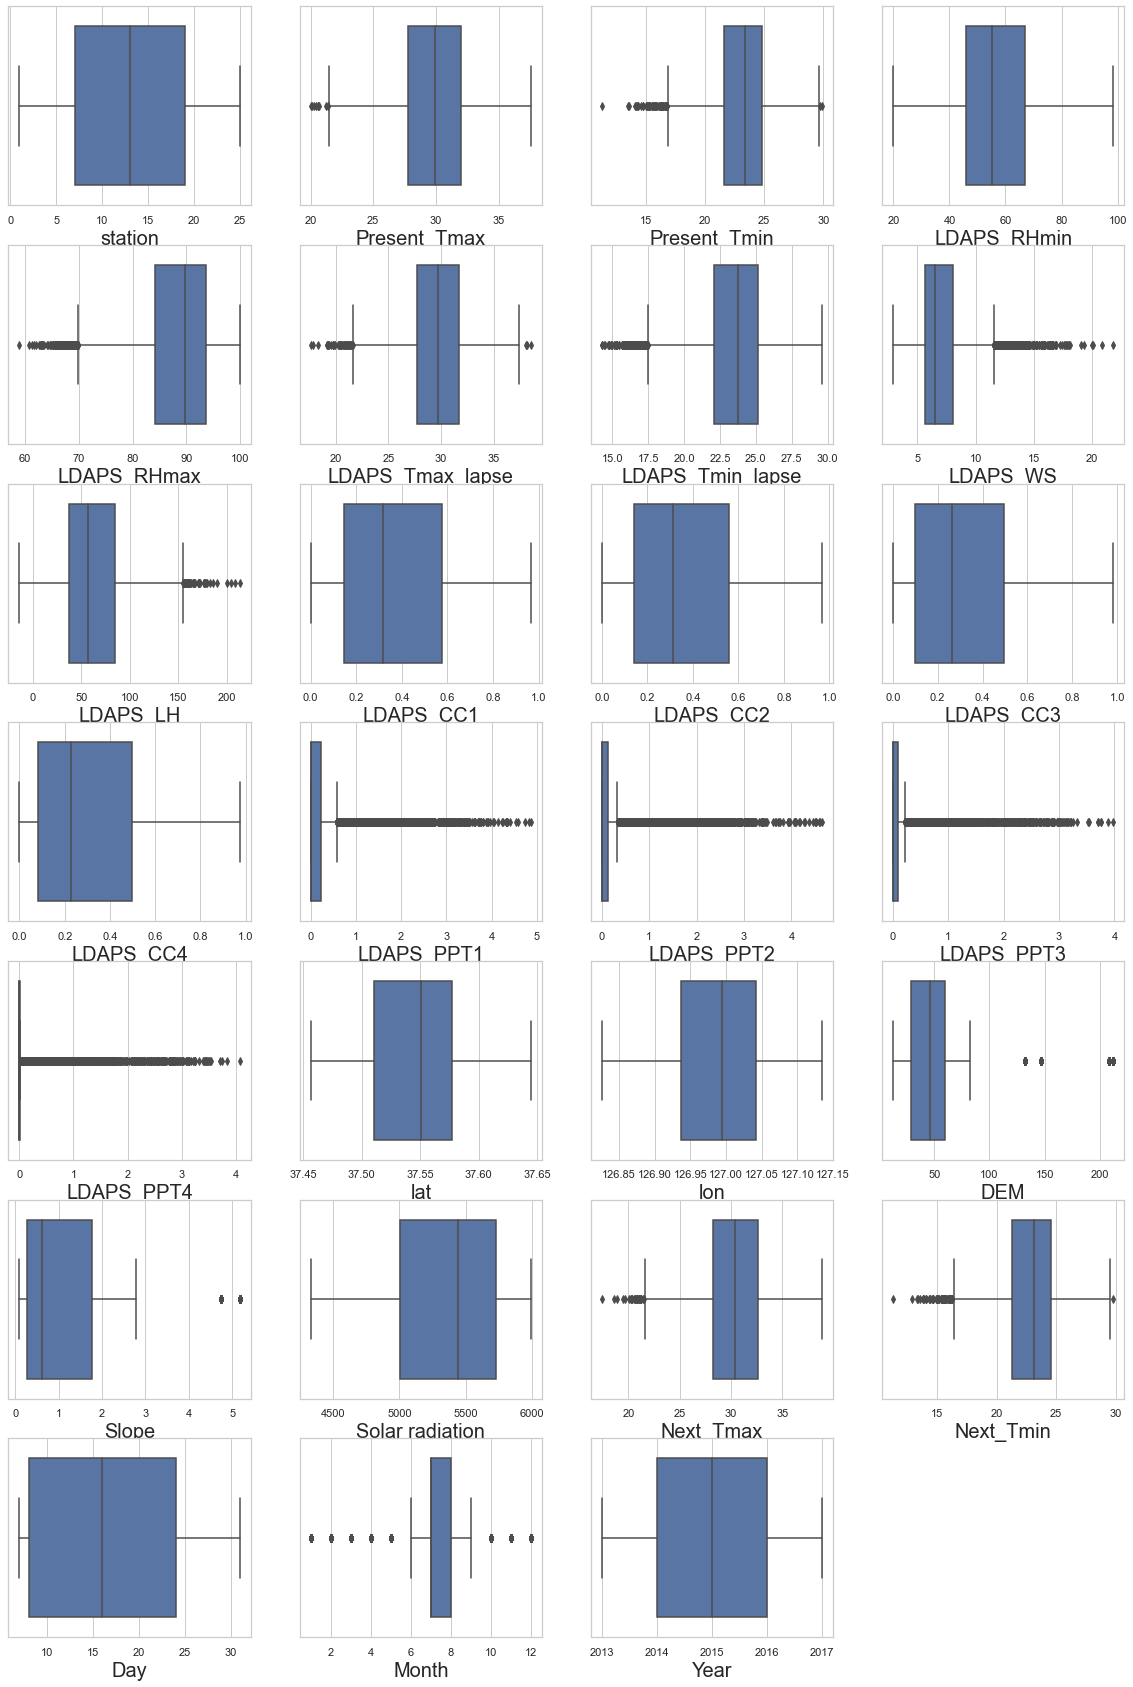

In [360]:
plt.figure(figsize=(20,30))
plotnumber=1

for i in df.columns:
    if plotnumber<=27:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

Outliers are present in Present_Tmax,Present_Tmin,,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,Next_Tmax,Next_Tmin and Month.

<AxesSubplot:xlabel='Day', ylabel='Present_Tmin'>

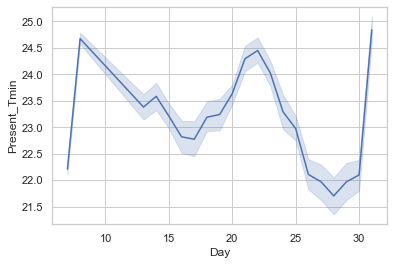

In [168]:
sns.set(style='whitegrid')
sns.lineplot('Day','Present_Tmin',data=df)

<AxesSubplot:xlabel='Day', ylabel='Present_Tmax'>

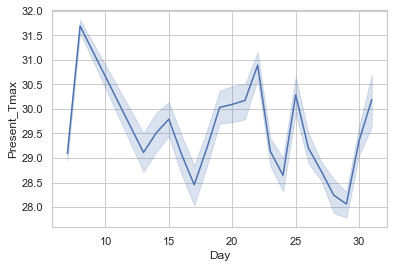

In [169]:
sns.lineplot('Day','Present_Tmax',data=df)

<AxesSubplot:xlabel='Month', ylabel='Present_Tmin'>

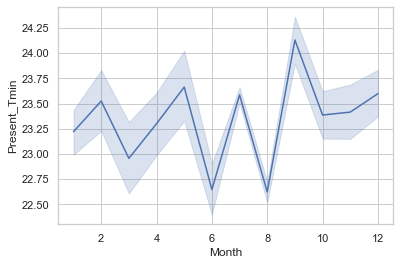

In [170]:
sns.lineplot('Month','Present_Tmin',data=df)

Temperature is less than 22.75 in 6 and 8th month. Temperature is high than 24 in 9th month

<AxesSubplot:xlabel='Month', ylabel='Present_Tmax'>

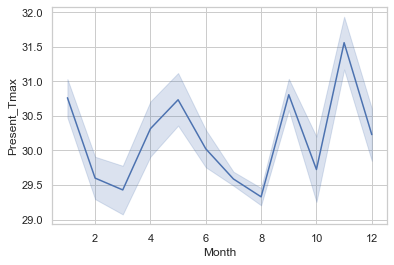

In [171]:
sns.lineplot('Month','Present_Tmax',data=df)

In the month of 3 and 8 Temperature is less than 29.5, Temperature higher than 31.0 in the month 11.

<AxesSubplot:xlabel='Year', ylabel='Present_Tmin'>

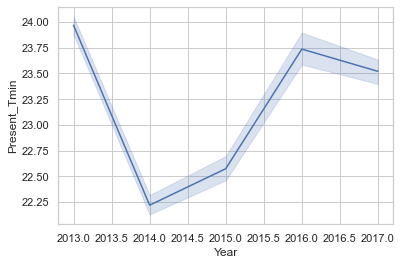

In [172]:
sns.lineplot('Year','Present_Tmin',data=df)

The lowest temperature is in 2014 year and highest in 2016.

<AxesSubplot:xlabel='Year', ylabel='Present_Tmax'>

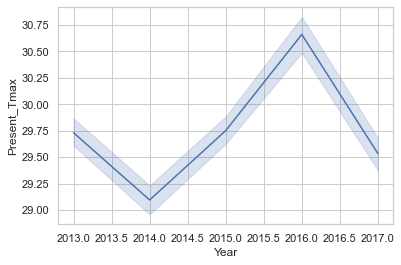

In [173]:
sns.lineplot('Year','Present_Tmax',data=df)

<AxesSubplot:xlabel='Day', ylabel='Next_Tmin'>

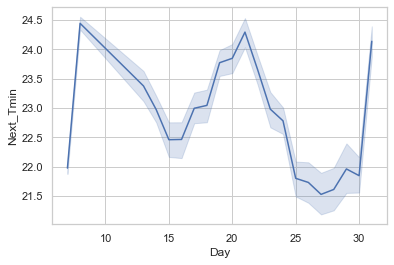

In [174]:
sns.lineplot('Day','Next_Tmin',data=df)

<AxesSubplot:xlabel='Day', ylabel='Next_Tmax'>

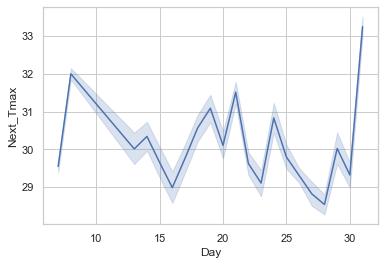

In [175]:
sns.lineplot('Day','Next_Tmax',data=df)

<AxesSubplot:xlabel='Month', ylabel='Next_Tmin'>

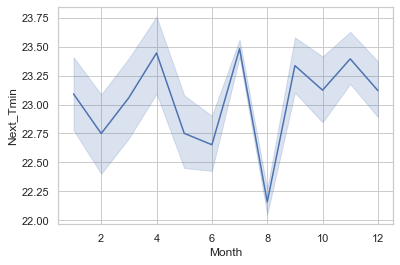

In [176]:
sns.lineplot('Month','Next_Tmin',data=df)

Temperature higher than 23.25 in the months 4,7,9 and 11.Temperature less than 22.50 in 8th month.

<AxesSubplot:xlabel='Month', ylabel='Next_Tmax'>

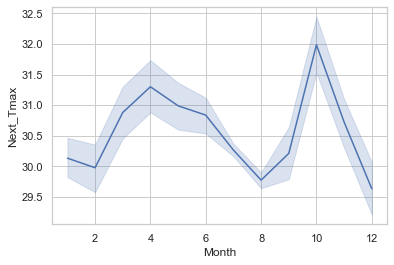

In [177]:
sns.lineplot('Month','Next_Tmax',data=df)

<AxesSubplot:xlabel='station', ylabel='Present_Tmin'>

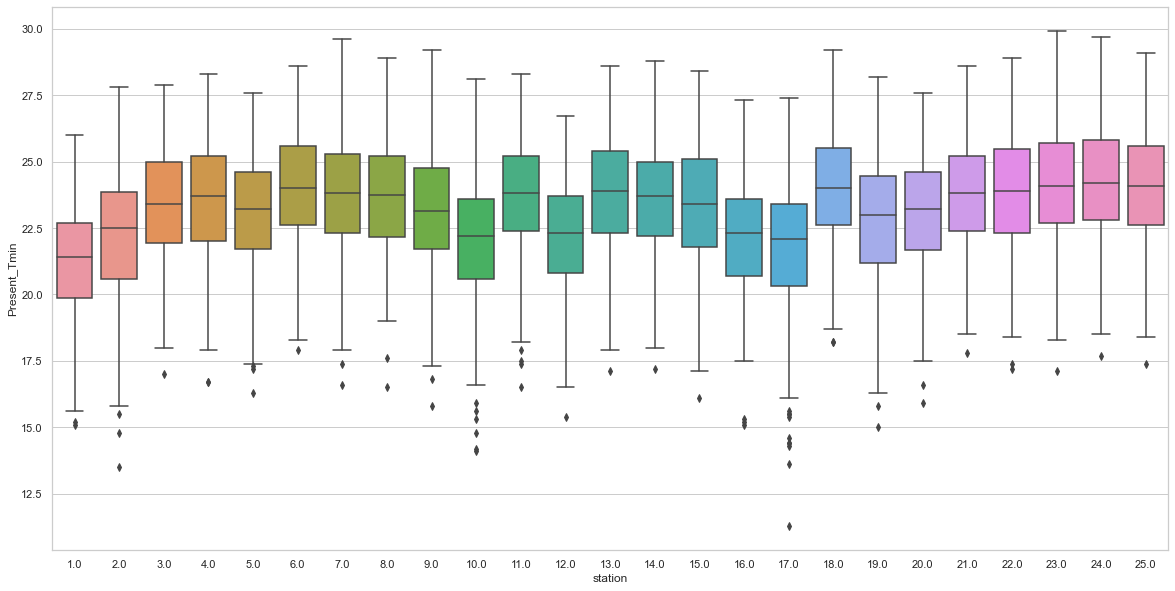

In [181]:
plt.figure(figsize=(20,10))
sns.boxplot('station','Present_Tmin',data=df)

<AxesSubplot:xlabel='station', ylabel='Present_Tmax'>

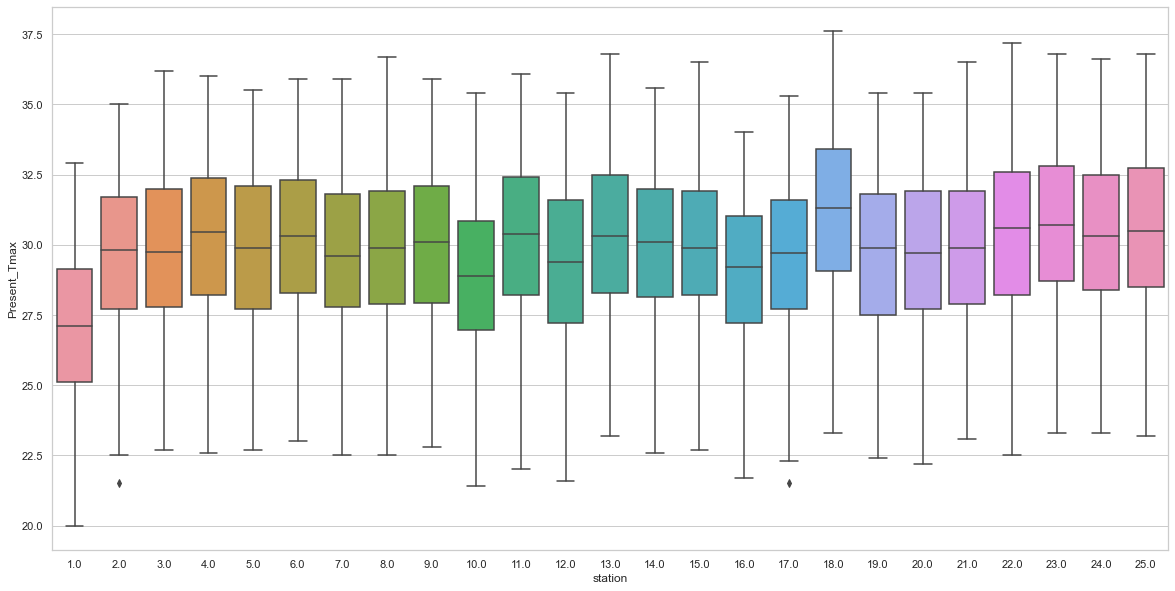

In [182]:
plt.figure(figsize=(20,10))
sns.boxplot('station','Present_Tmax',data=df)

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

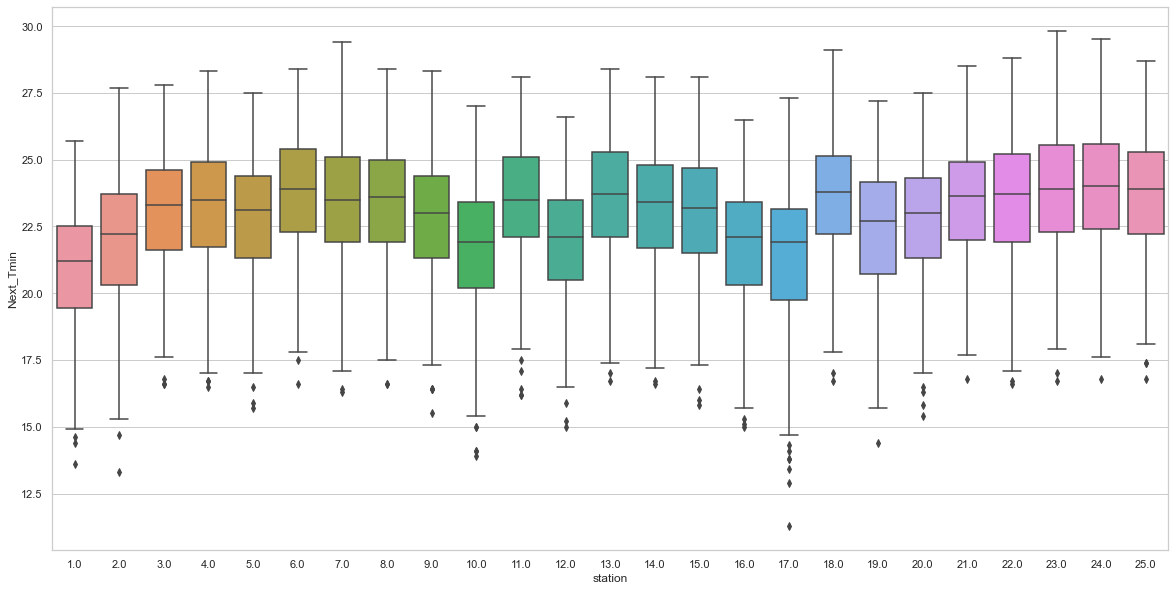

In [183]:
plt.figure(figsize=(20,10))
sns.boxplot('station','Next_Tmin',data=df)

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

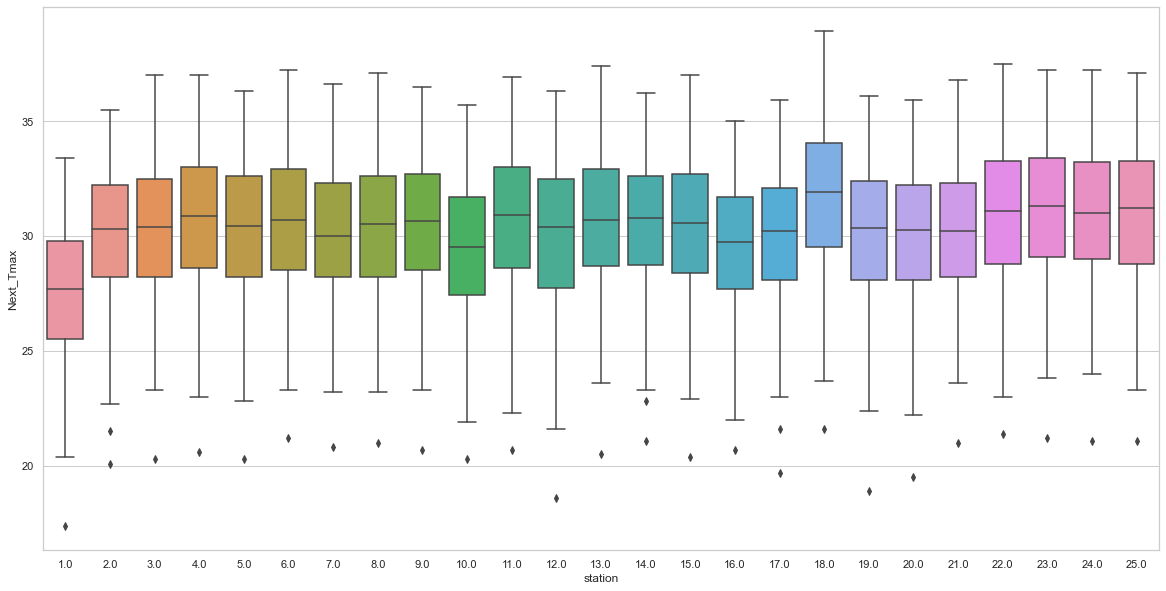

In [184]:
plt.figure(figsize=(20,10))
sns.boxplot('station','Next_Tmax',data=df)

<AxesSubplot:xlabel='station', ylabel='Present_Tmin'>

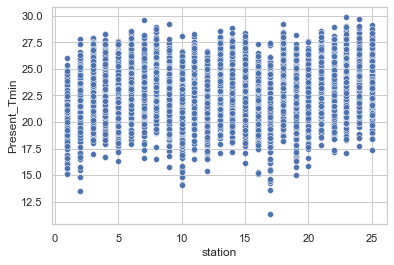

In [178]:
sns.scatterplot('station','Present_Tmin',data=df)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Present_Tmax'>

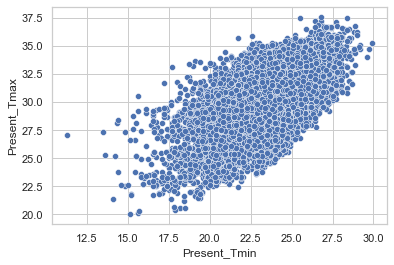

In [185]:
sns.scatterplot('Present_Tmin','Present_Tmax',data=df)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Next_Tmax'>

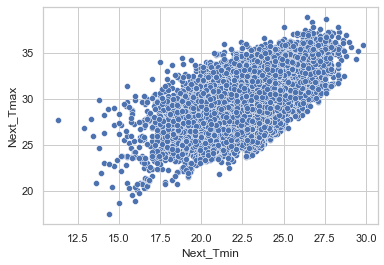

In [186]:
sns.scatterplot('Next_Tmin','Next_Tmax',data=df)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

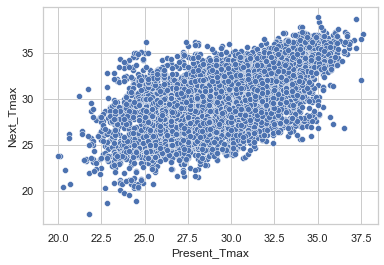

In [187]:
sns.scatterplot('Present_Tmax','Next_Tmax',data=df)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

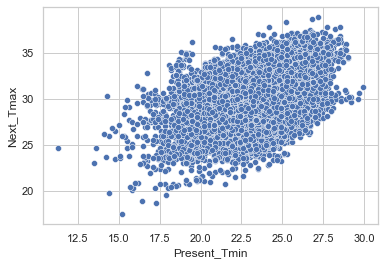

In [188]:
sns.scatterplot('Present_Tmin','Next_Tmax',data=df)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

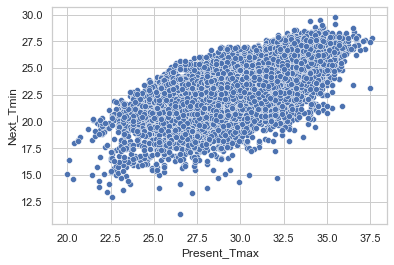

In [189]:
sns.scatterplot('Present_Tmax','Next_Tmin',data=df)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

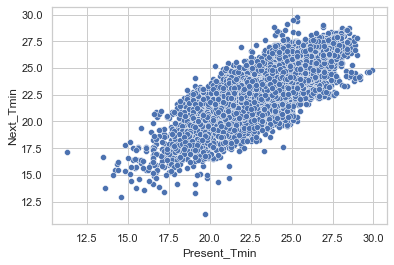

In [190]:
sns.scatterplot('Present_Tmin','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmin'>

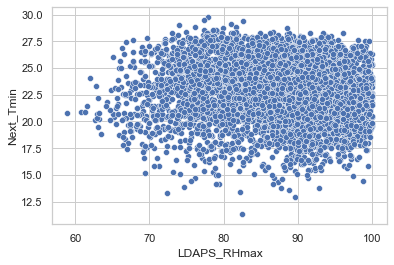

In [191]:
sns.scatterplot('LDAPS_RHmax','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

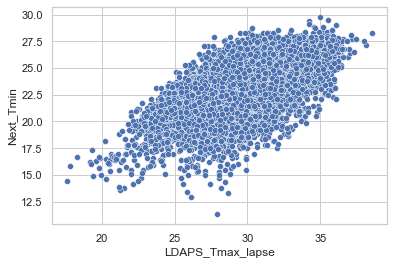

In [192]:
sns.scatterplot('LDAPS_Tmax_lapse','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

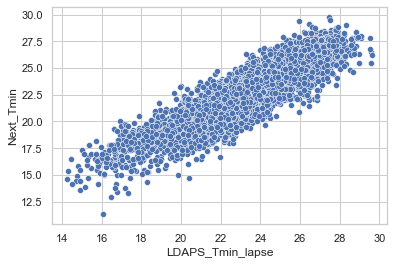

In [193]:
sns.scatterplot('LDAPS_Tmin_lapse','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

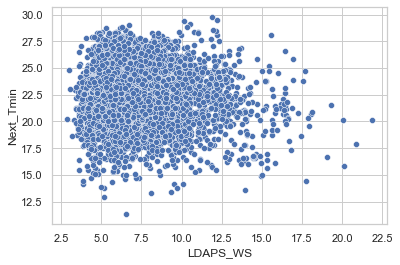

In [194]:
sns.scatterplot('LDAPS_WS','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

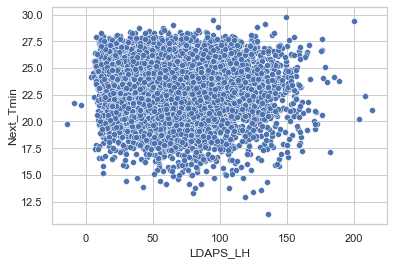

In [195]:
sns.scatterplot('LDAPS_LH','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmin'>

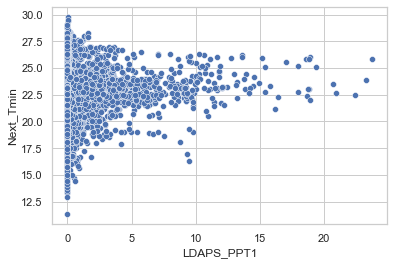

In [196]:
sns.scatterplot('LDAPS_PPT1','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmin'>

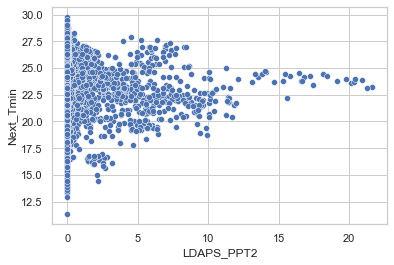

In [197]:
sns.scatterplot('LDAPS_PPT2','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmin'>

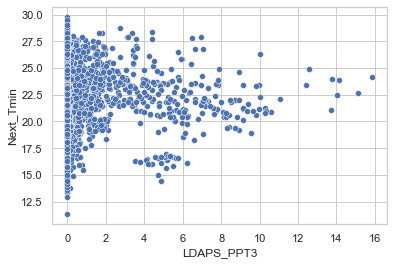

In [198]:
sns.scatterplot('LDAPS_PPT3','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmin'>

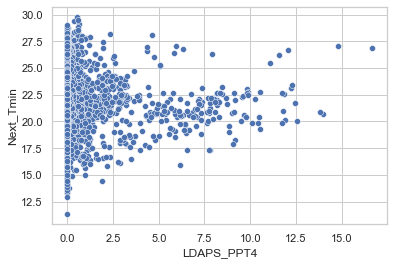

In [199]:
sns.scatterplot('LDAPS_PPT4','Next_Tmin',data=df)

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

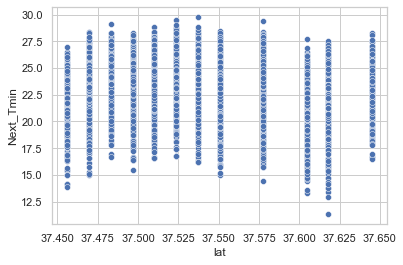

In [200]:
sns.scatterplot('lat','Next_Tmin',data=df)

<AxesSubplot:xlabel='lon', ylabel='Next_Tmin'>

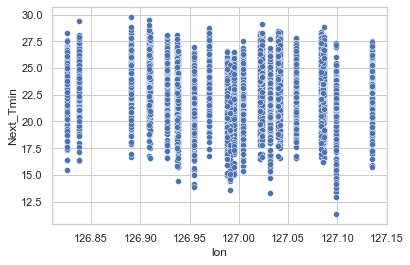

In [201]:
sns.scatterplot('lon','Next_Tmin',data=df)

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmin'>

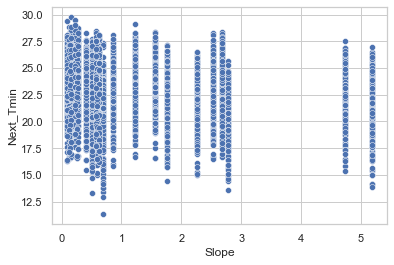

In [202]:
sns.scatterplot('Slope','Next_Tmin',data=df)

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

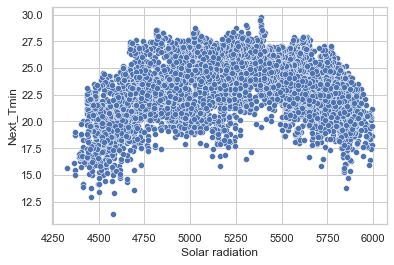

In [203]:
sns.scatterplot('Solar radiation','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmax'>

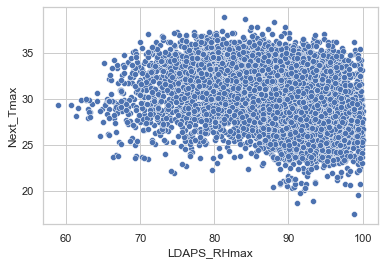

In [204]:
sns.scatterplot('LDAPS_RHmax','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

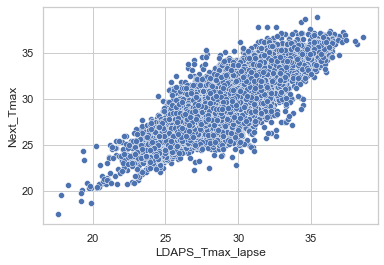

In [205]:
sns.scatterplot('LDAPS_Tmax_lapse','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

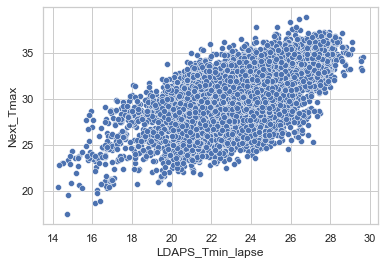

In [206]:
sns.scatterplot('LDAPS_Tmin_lapse','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmax'>

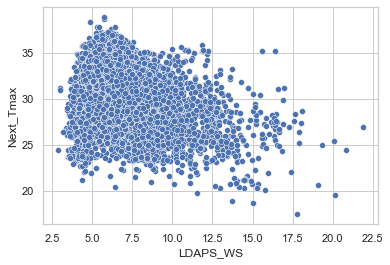

In [207]:
sns.scatterplot('LDAPS_WS','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmax'>

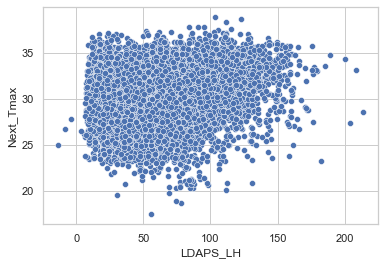

In [208]:
sns.scatterplot('LDAPS_LH','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

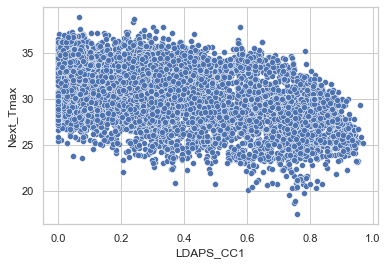

In [210]:
sns.scatterplot('LDAPS_CC1','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmax'>

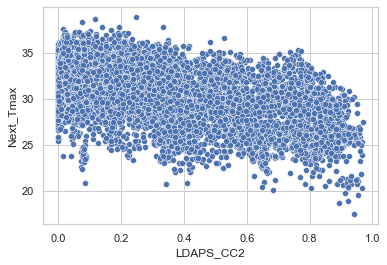

In [211]:
sns.scatterplot('LDAPS_CC2','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

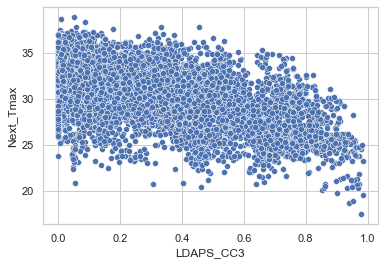

In [212]:
sns.scatterplot('LDAPS_CC3','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

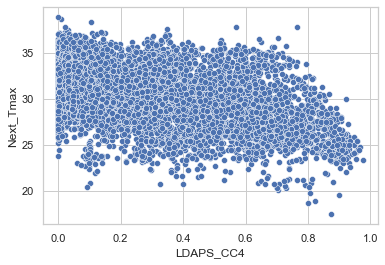

In [213]:
sns.scatterplot('LDAPS_CC4','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmax'>

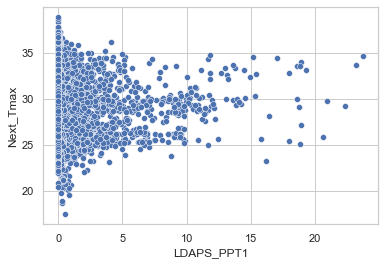

In [214]:
sns.scatterplot('LDAPS_PPT1','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmax'>

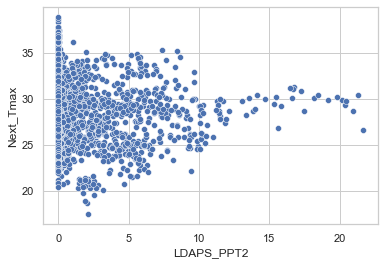

In [215]:
sns.scatterplot('LDAPS_PPT2','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmax'>

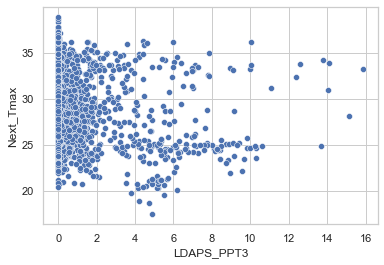

In [216]:
sns.scatterplot('LDAPS_PPT3','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmax'>

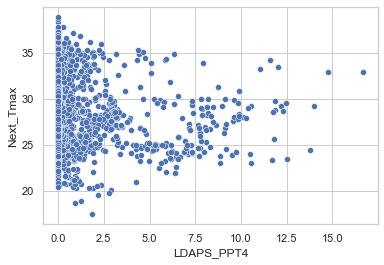

In [217]:
sns.scatterplot('LDAPS_PPT4','Next_Tmax',data=df)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Next_Tmax'>

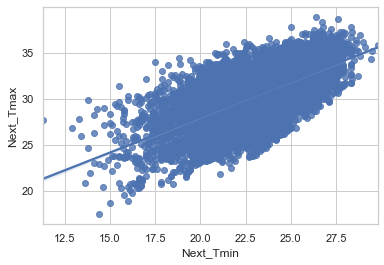

In [219]:
sns.regplot('Next_Tmin','Next_Tmax',data=df)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Next_Tmax'>

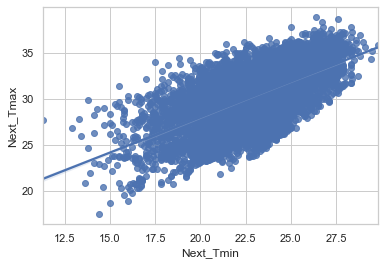

In [221]:
sns.regplot('Next_Tmin','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

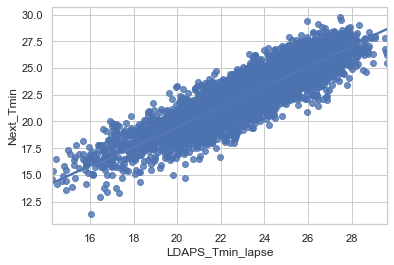

In [222]:
sns.regplot('LDAPS_Tmin_lapse','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

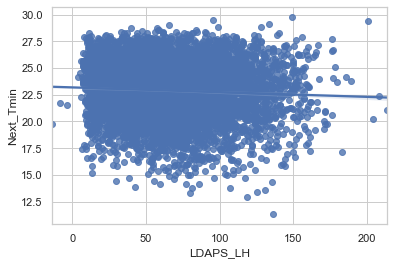

In [224]:
sns.regplot('LDAPS_LH','Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

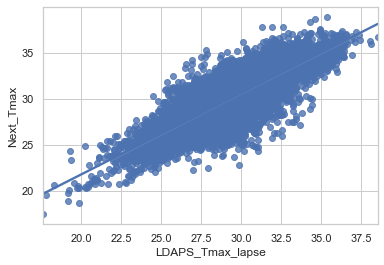

In [225]:
sns.regplot('LDAPS_Tmax_lapse','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

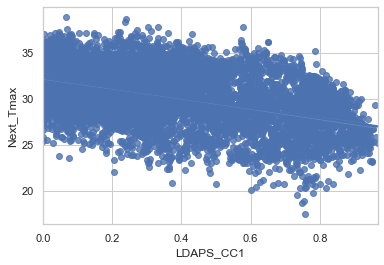

In [226]:
sns.regplot('LDAPS_CC1','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

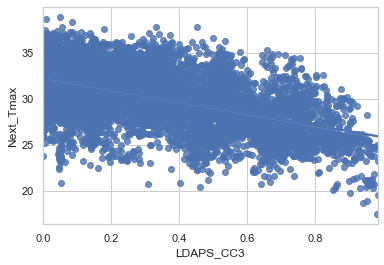

In [227]:
sns.regplot('LDAPS_CC3','Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmax'>

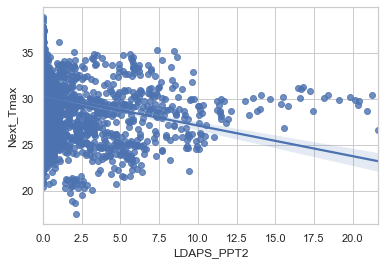

In [228]:
sns.regplot('LDAPS_PPT2','Next_Tmax',data=df)

In [470]:
#Finding outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [471]:
#Removing the outliers
dfnew=df[(z<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (6593, 27)


In [472]:
dataloss=((7588-6593)/7588)*100
dataloss

13.112809699525565

13% Data loss after outlier removal.

# Next_Tmax prediction

In [473]:
# Separating dependent and independent variables

X=df.drop('Next_Tmax',axis=1)
Y=df['Next_Tmax']
print(X.shape)
print(Y.shape)

(6593, 26)
(6593,)


In [474]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

VIF          Features
0   5.230777e+00           station
1   3.142641e+02      Present_Tmax
2   3.489887e+02      Present_Tmin
3   1.019103e+02       LDAPS_RHmin
4   3.648202e+02       LDAPS_RHmax
5   8.278921e+02  LDAPS_Tmax_lapse
6   1.017605e+03  LDAPS_Tmin_lapse
7   1.875779e+01          LDAPS_WS
8   6.836537e+00          LDAPS_LH
9   1.205394e+01         LDAPS_CC1
10  1.439725e+01         LDAPS_CC2
11  1.282251e+01         LDAPS_CC3
12  6.858819e+00         LDAPS_CC4
13  2.593277e+00        LDAPS_PPT1
14  2.097836e+00        LDAPS_PPT2
15  1.720385e+00        LDAPS_PPT3
16  1.741769e+00        LDAPS_PPT4
17  6.776838e+05               lat
18  1.657319e+06               lon
19  7.673470e+00               DEM
20  5.580233e+00             Slope
21  2.448090e+02   Solar radiation
22  5.571482e+02         Next_Tmin
23  6.306829e+00               Day
24  1.245366e+01             Month
25  1.311175e+06              Year

Multicollinearity in LDAPS_Tmax_lapse,LDAPS_LH,LDAPS_CC4,lat,DEM and Day.

In [475]:
#Removing multicollinearity columns
X=X.drop(['LDAPS_LH','LDAPS_CC4','lat','DEM','Day'],axis=1)

In [476]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X=scale.fit_transform(X)
X

array([[-1.67363764, -0.43645562, -0.81219726, ..., -0.79687566,
        -0.48358003, -1.4207991 ],
       [-1.53495141,  0.68411367, -0.72557077, ..., -0.24428245,
        -0.48358003, -1.4207991 ],
       [-1.39626517,  0.5790603 ,  0.0107544 , ...,  0.35081794,
        -0.48358003, -1.4207991 ],
       ...,
       [ 1.37745955, -2.3274163 , -2.67466683, ..., -2.11459794,
         0.40948527,  1.45107289],
       [ 1.51614578, -2.3274163 , -2.41478735, ..., -1.81704774,
         0.40948527,  1.45107289],
       [ 1.65483202, -2.3624341 , -2.54472709, ..., -2.41214813,
         0.40948527,  1.45107289]])

In [477]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression()
ls=Lasso()
rd=Ridge()
el=ElasticNet()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gb=GradientBoostingRegressor()

In [478]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
#Linear
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.7815386835702168

In [479]:
predlr=lr.predict(x_test)
print('R2 score :',r2_score(y_test,predlr))
print('Mean squared error :',mean_squared_error(y_test,predlr))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predlr)))

R2 score : 0.766835120328123
Mean squared error : 1.8746229292121637
Root Mean squared error  : 1.3691687000556811


In [480]:
#Lasso
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.558209851154948

In [481]:
predls=ls.predict(x_test)
print('R2 score :',r2_score(y_test,predls))
print('Mean squared error :',mean_squared_error(y_test,predls))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predls)))

R2 score : 0.5449209240998591
Mean squared error : 3.6587914590208426
Root Mean squared error  : 1.9127967636476289


In [482]:
#Ridge
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.781538491584077

In [483]:
predrd=rd.predict(x_test)
print('R2 score :',r2_score(y_test,predrd))
print('Mean squared error :',mean_squared_error(y_test,predrd))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrd)))

R2 score : 0.7668383905549373
Mean squared error : 1.8745966369069988
Root Mean squared error  : 1.3691590984640898


In [484]:
#ElasticNet
el.fit(x_train,y_train)
el.score(x_train,y_train)

0.6405868118812308

In [485]:
predel=el.predict(x_test)
print('R2 score :',r2_score(y_test,predel))
print('Mean squared error :',mean_squared_error(y_test,predel))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predel)))

R2 score : 0.627623316623912
Mean squared error : 2.9938722758897067
Root Mean squared error  : 1.7302809817742628


In [486]:
#Decision tree
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

1.0

In [487]:
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.7489223273669362
Mean squared error : 2.0186400404448936
Root Mean squared error  : 1.4207885277003378


In [488]:
#Random forest
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9844853295475133

In [489]:
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.8797919249867269
Mean squared error : 0.9664612184024266
Root Mean squared error  : 0.9830875944708216


In [490]:
#AdaBoost
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.7822909133026635

In [491]:
predad=ad.predict(x_test)
print('R2 score :',r2_score(y_test,predad))
print('Mean squared error :',mean_squared_error(y_test,predad))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predad)))

R2 score : 0.7495333476818107
Mean squared error : 2.013727496608575
Root Mean squared error  : 1.4190586656683983


In [492]:
#GradientBoost
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.8822618176998647

In [493]:
predgb=gb.predict(x_test)
print('R2 score :',r2_score(y_test,predgb))
print('Mean squared error :',mean_squared_error(y_test,predgb))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predgb)))

R2 score : 0.8390732395475575
Mean squared error : 1.2938354845400337
Root Mean squared error  : 1.1374688938779969


Cross Validation

In [494]:
#linear
score=cross_val_score(lr,X,Y,cv=3)
print(score)
print(score.mean())

[0.63975213 0.72211309 0.66748215]
0.6764491265606933


In [495]:
#lasso
score=cross_val_score(ls,X,Y,cv=3)
print(score)
print(score.mean())

[0.48552438 0.57141587 0.44490812]
0.5006161253637459


In [496]:
#Ridge
score=cross_val_score(rd,X,Y,cv=3)
print(score)
print(score.mean())

[0.63979833 0.72210467 0.66774831]
0.6765504351345752


In [497]:
#ElasticNet
score=cross_val_score(el,X,Y,cv=3)
print(score)
print(score.mean())

[0.55215363 0.63706951 0.55562832]
0.5816171518879382


In [498]:
#Decision tree
score=cross_val_score(dt,X,Y,cv=3)
print(score)
print(score.mean())

[0.4367379  0.46008377 0.48081379]
0.45921182067142335


In [499]:
#Random Forest
score=cross_val_score(rf,X,Y,cv=3)
print(score)
print(score.mean())

[0.63514769 0.69549369 0.72139121]
0.6840108622591865


In [500]:
#AdaBoost
score=cross_val_score(ad,X,Y,cv=3)
print(score)
print(score.mean())

[0.61304912 0.66652976 0.68891626]
0.6561650462044749


In [501]:
#GradientBoosting
score=cross_val_score(gb,X,Y,cv=3)
print(score)
print(score.mean())

[0.67959113 0.7333665  0.75429225]
0.7224166260869485


Hyperparameter Tuning

In [502]:
#Linear

grid_para={'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True,False],'positive':[True,False],'n_jobs':range(1,50,2)}
grid_search=GridSearchCV(estimator=lr,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': range(1, 50, 2), 'normalize': [True, False],
                         'positive': [True, False]})

In [503]:
best_para=grid_search.best_params_
print(best_para)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False, 'positive': False}


In [504]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False,positive=False)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('R2 score :',r2_score(y_test,predlr))
print('Mean squared error :',mean_squared_error(y_test,predlr))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predlr)))

R2 score : 0.766835120328123
Mean squared error : 1.8746229292121637
Root Mean squared error  : 1.3691687000556811


Text(0, 0.5, 'Predicted data')

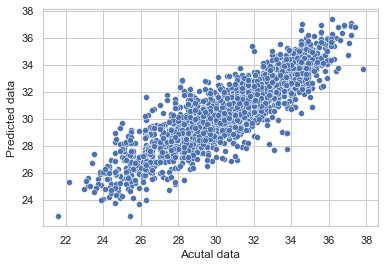

In [529]:
sns.scatterplot(x=y_test,y=predlr)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [505]:
#Lasso

grid_para={'fit_intercept':[True,False],'copy_X':[True,False],'positive':[True,False],'normalize':[True,False],'tol':[0.0001,0.001,0.01,0.1],'selection':['cyclic','random']}
grid_search=GridSearchCV(estimator=ls,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False], 'positive': [True, False],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]})

In [506]:
best_para=grid_search.best_params_
print(best_para)

{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': True, 'selection': 'random', 'tol': 0.1}


In [507]:
ls=Lasso(copy_X=True,fit_intercept=True,normalize=False,positive=False,tol=0.1)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('R2 score :',r2_score(y_test,predls))
print('Mean squared error :',mean_squared_error(y_test,predls))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predls)))

R2 score : 0.5449209240998591
Mean squared error : 3.6587914590208426
Root Mean squared error  : 1.9127967636476289


Text(0, 0.5, 'Predicted data')

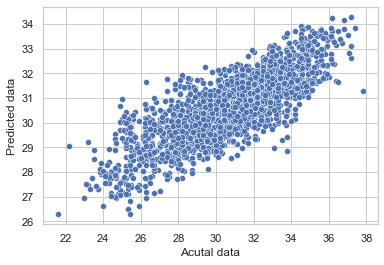

In [530]:
sns.scatterplot(x=y_test,y=predls)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [508]:
#Ridge

grid_para={'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True,False],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs'],'tol':[0.0001,0.001,0.01,0.1]}
grid_search=GridSearchCV(estimator=rd,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]})

In [509]:
best_para=grid_search.best_params_
print(best_para)

{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'solver': 'saga', 'tol': 0.01}


In [510]:
rd=Ridge(copy_X=True,fit_intercept=True,normalize=False,solver='saga',tol=0.01)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('R2 score :',r2_score(y_test,predrd))
print('Mean squared error :',mean_squared_error(y_test,predrd))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrd)))

R2 score : 0.7668348009693651
Mean squared error : 1.87462549682548
Root Mean squared error  : 1.3691696377094695


Text(0, 0.5, 'Predicted data')

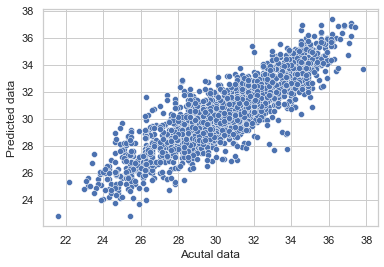

In [531]:
sns.scatterplot(x=y_test,y=predrd)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [511]:
#ElasticNet

grid_para={'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True,False],'positive':[True,False]}
grid_search=GridSearchCV(estimator=el,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [512]:
best_para=grid_search.best_params_
print(best_para)

{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False}


In [513]:
el=ElasticNet(copy_X=True,fit_intercept=True,normalize=False,positive=False)
el.fit(x_train,y_train)
predel=el.predict(x_test)
print('R2 score :',r2_score(y_test,predel))
print('Mean squared error :',mean_squared_error(y_test,predel))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predel)))

R2 score : 0.627623316623912
Mean squared error : 2.9938722758897067
Root Mean squared error  : 1.7302809817742628


Text(0, 0.5, 'Predicted data')

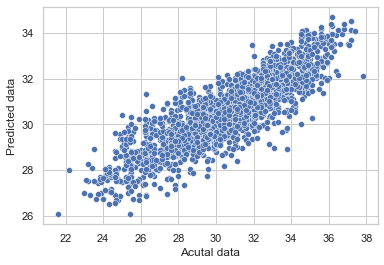

In [532]:
sns.scatterplot(x=y_test,y=predel)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [514]:
#DTR
grid_para={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,1),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dt,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [515]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'friedman_mse', 'max_depth': 11, 'max_features': 'auto', 'min_samples_split': 6, 'splitter': 'random'}


In [516]:
dt=DecisionTreeRegressor(criterion='friedman_mse',max_depth=11,max_features='auto',min_samples_split=6,splitter='random')
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.7396738875177001
Mean squared error : 2.092996596308776
Root Mean squared error  : 1.4467192527608028


Text(0, 0.5, 'Predicted data')

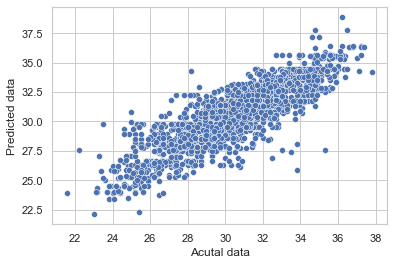

In [533]:
sns.scatterplot(x=y_test,y=preddt)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [517]:
#Random Forest
grid_para={'criterion':['squared_error','absolute_error','poisson'],'min_samples_split':[1,5,10,15],'min_samples_leaf':[1,5,10,15],'max_depth':[3,6,7,10],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rf,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 6, 7, 10],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [1, 5, 10, 15]})

In [518]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'poisson', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 10}


In [519]:
rf=RandomForestRegressor(criterion='poisson',max_depth=10,max_features='log2',min_samples_leaf=15,min_samples_split=10)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.26182811115722016
Mean squared error : 5.934830110228784
Root Mean squared error  : 2.436150674779535


Text(0, 0.5, 'Predicted data')

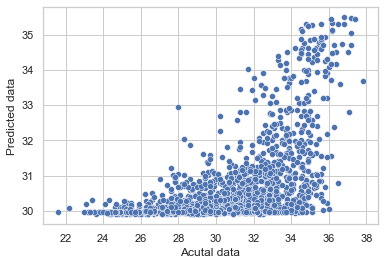

In [534]:
sns.scatterplot(x=y_test,y=predrf)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [521]:
#AdaBoost
grid_para={'loss':['linear','square','exponential'],'learning_rate':[0.001,0.01,0.1,1.0,1.5],'random_state':[40,42,45,47]}
grid_search=GridSearchCV(estimator=ad,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'random_state': [40, 42, 45, 47]})

In [522]:
best_para=grid_search.best_params_
print(best_para)

{'learning_rate': 1.5, 'loss': 'square', 'random_state': 47}


In [523]:
ad=AdaBoostRegressor(learning_rate=1.5,loss='square',random_state=47)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('R2 score :',r2_score(y_test,predad))
print('Mean squared error :',mean_squared_error(y_test,predad))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predad)))

R2 score : 0.7481429038763749
Mean squared error : 2.0249065294162554
Root Mean squared error  : 1.4229921044813478


Text(0, 0.5, 'Predicted data')

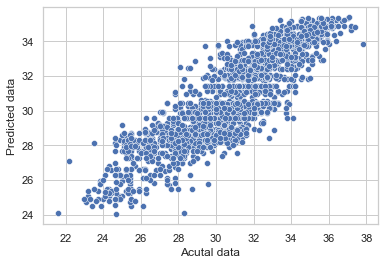

In [535]:
sns.scatterplot(x=y_test,y=predad)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [525]:
#GradientBoost
grid_para={'learning_rate':[0.001,0.01,0.1,1.0,1.5],'subsample':[0.1,1.0,1.5,2.0],'max_depth':[2,5,7,10],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=gb,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'max_depth': [2, 5, 7, 10],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'subsample': [0.1, 1.0, 1.5, 2.0]})

In [526]:
best_para=grid_search.best_params_
print(best_para)

{'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'log2', 'subsample': 1.0}


In [537]:
gb=GradientBoostingRegressor(learning_rate=0.1,max_depth=7,max_features='auto',subsample=1.0)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('R2 score :',r2_score(y_test,predgb))
print('Mean squared error :',mean_squared_error(y_test,predgb))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predgb)))

R2 score : 0.9042027276443719
Mean squared error : 0.7702007419237558
Root Mean squared error  : 0.877610814611896


Text(0, 0.5, 'Predicted data')

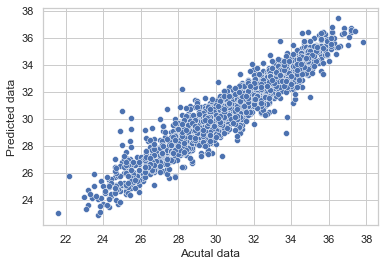

In [528]:
sns.scatterplot(x=y_test,y=predgb)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

The Linear regression model r2 score is 76.68% and cross validation score is 67%.

The Ridge regression model r2 score is 76.68% and cross validation score is 67%.

The Gradient Boosting regression model r2 score is 90.42% and cross validation score is 73%.

Gradient Boosting Model gives the best result.

In [547]:
import pickle
filename="Temp Max.pkl"
pickle.dump(gb,open(filename, 'wb'))

In [548]:
model=pickle.load(open("Temp Max.pkl",'rb'))
result=model.score(x_test,y_test)
print('The R2 score of the model : ',result*100)

The R2 score of the model :  90.42027276443719


In [549]:
Accuracy=pd.DataFrame([model.predict(x_test),predgb],index=['Predicted','Original'])
Accuracy

0          1         2          3          4          5     \
Predicted  31.498606  27.378008  29.75287  31.424927  27.320243  30.218097   
Original   31.498606  27.378008  29.75287  31.424927  27.320243  30.218097   

                6          7          8          9     ...       1968  \
Predicted  24.105115  26.990125  30.066614  31.969881  ...  31.450035   
Original   24.105115  26.990125  30.066614  31.969881  ...  31.450035   

                1969       1970       1971       1972       1973       1974  \
Predicted  31.431333  24.856014  27.098767  32.439768  30.737753  34.135604   
Original   31.431333  24.856014  27.098767  32.439768  30.737753  34.135604   

                1975       1976       1977  
Predicted  28.022654  30.097022  31.659062  
Original   28.022654  30.097022  31.659062  

[2 rows x 1978 columns]

# Next_Tmin Prediction

In [550]:
# Separating dependent and independent variables

x=df.drop('Next_Tmin',axis=1)
y=df['Next_Tmin']
print(x.shape)
print(y.shape)

(6593, 26)
(6593,)


In [551]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])] 
vif['Features']=x.columns
vif

VIF          Features
0   5.268374e+00           station
1   3.240598e+02      Present_Tmax
2   3.258612e+02      Present_Tmin
3   1.011438e+02       LDAPS_RHmin
4   3.648266e+02       LDAPS_RHmax
5   9.782484e+02  LDAPS_Tmax_lapse
6   8.018252e+02  LDAPS_Tmin_lapse
7   1.888136e+01          LDAPS_WS
8   6.968908e+00          LDAPS_LH
9   1.207249e+01         LDAPS_CC1
10  1.437548e+01         LDAPS_CC2
11  1.288715e+01         LDAPS_CC3
12  7.038496e+00         LDAPS_CC4
13  2.603971e+00        LDAPS_PPT1
14  2.079161e+00        LDAPS_PPT2
15  1.720370e+00        LDAPS_PPT3
16  1.743450e+00        LDAPS_PPT4
17  6.768678e+05               lat
18  1.667393e+06               lon
19  7.273959e+00               DEM
20  5.444216e+00             Slope
21  2.450163e+02   Solar radiation
22  4.804874e+02         Next_Tmax
23  6.249044e+00               Day
24  1.248257e+01             Month
25  1.322120e+06              Year

Multicollinearity present in LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_LH,LDAPS_CC4,lat,DEM and Day.

In [553]:
#Removing multicollinearity columns
x=x.drop(['LDAPS_Tmax_lapse','LDAPS_LH','LDAPS_CC4','lat','DEM','Day'],axis=1)

In [554]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-1.67363764, -0.43645562, -0.81219726, ..., -0.50920882,
        -0.48358003, -1.4207991 ],
       [-1.53495141,  0.68411367, -0.72557077, ..., -0.02617138,
        -0.48358003, -1.4207991 ],
       [-1.39626517,  0.5790603 ,  0.0107544 , ...,  0.18084467,
        -0.48358003, -1.4207991 ],
       ...,
       [ 1.37745955, -2.3274163 , -2.67466683, ..., -0.78523022,
         0.40948527,  1.45107289],
       [ 1.51614578, -2.3274163 , -2.41478735, ..., -0.6817222 ,
         0.40948527,  1.45107289],
       [ 1.65483202, -2.3624341 , -2.54472709, ..., -0.9577436 ,
         0.40948527,  1.45107289]])

In [555]:
lr1=LinearRegression()
ls1=Lasso()
rd1=Ridge()
el1=ElasticNet()
dt1=DecisionTreeRegressor()
rf1=RandomForestRegressor()
ad1=AdaBoostRegressor()
gb1=GradientBoostingRegressor()

In [556]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#Linear
lr1=LinearRegression()
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)

0.8340998533849998

In [557]:
predlr1=lr1.predict(x_test)
print('R2 score :',r2_score(y_test,predlr1))
print('Mean squared error :',mean_squared_error(y_test,predlr1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predlr1)))

R2 score : 0.8200196729952777
Mean squared error : 0.9414175956534951
Root Mean squared error  : 0.9702667652009396


In [558]:
#Lasso
ls1.fit(x_train,y_train)
ls1.score(x_train,y_train)

0.6066663089220339

In [559]:
predls1=ls1.predict(x_test)
print('R2 score :',r2_score(y_test,predls1))
print('Mean squared error :',mean_squared_error(y_test,predls1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predls1)))

R2 score : 0.600337018767025
Mean squared error : 2.0905049408771395
Root Mean squared error  : 1.4458578563873903


In [560]:
#Ridge
rd1.fit(x_train,y_train)
rd1.score(x_train,y_train)

0.8340998298449717

In [561]:
predrd1=rd1.predict(x_test)
print('R2 score :',r2_score(y_test,predrd1))
print('Mean squared error :',mean_squared_error(y_test,predrd1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrd1)))

R2 score : 0.820022365923506
Mean squared error : 0.9414035098361164
Root Mean squared error  : 0.9702595064394455


In [562]:
#ElasticNet
el1.fit(x_train,y_train)
el1.score(x_train,y_train)

0.6818676955709706

In [563]:
predel1=el1.predict(x_test)
print('R2 score :',r2_score(y_test,predel1))
print('Mean squared error :',mean_squared_error(y_test,predel1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predel1)))

R2 score : 0.6769031101606813
Mean squared error : 1.6900130267441555
Root Mean squared error  : 1.3000050102765588


In [564]:
#Decision tree
dt1.fit(x_train,y_train)
dt1.score(x_train,y_train)

1.0

In [565]:
preddt1=dt1.predict(x_test)
print('R2 score :',r2_score(y_test,preddt1))
print('Mean squared error :',mean_squared_error(y_test,preddt1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt1)))

R2 score : 0.7590656912563245
Mean squared error : 1.2602477249747221
Root Mean squared error  : 1.122607556083034


In [566]:
#Random forest
rf1.fit(x_train,y_train)
rf1.score(x_train,y_train)

0.9859768034050758

In [567]:
predrf1=rf1.predict(x_test)
print('R2 score :',r2_score(y_test,predrf1))
print('Mean squared error :',mean_squared_error(y_test,predrf1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf1)))

R2 score : 0.8946039830750337
Mean squared error : 0.5512917244691607
Root Mean squared error  : 0.742490218433321


In [568]:
#AdaBoost
ad1.fit(x_train,y_train)
ad1.score(x_train,y_train)

0.8202843687134747

In [569]:
predad1=ad1.predict(x_test)
print('R2 score :',r2_score(y_test,predad1))
print('Mean squared error :',mean_squared_error(y_test,predad1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predad1)))

R2 score : 0.7936194804021193
Mean squared error : 1.0795082761709738
Root Mean squared error  : 1.0389938768688551


In [570]:
#GradientBoost
gb1.fit(x_train,y_train)
gb1.score(x_train,y_train)

0.9133054396760265

In [571]:
predgb1=gb1.predict(x_test)
print('R2 score :',r2_score(y_test,predgb1))
print('Mean squared error :',mean_squared_error(y_test,predgb1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predgb1)))

R2 score : 0.88151167254429
Mean squared error : 0.6197732730168435
Root Mean squared error  : 0.7872568024582852


Cross Validation

In [601]:
#linear
score=cross_val_score(lr1,x,y,cv=3)
print(score)
print(score.mean())

[0.72648372 0.76710198 0.8477858 ]
0.7804571665016274


In [602]:
#lasso
score=cross_val_score(ls1,x,y,cv=3)
print(score)
print(score.mean())

[0.56631313 0.36100906 0.39916219]
0.44216146108358406


In [603]:
#Ridge
score=cross_val_score(rd1,x,y,cv=3)
print(score)
print(score.mean())

[0.72675176 0.76606288 0.84713687]
0.7799838339984504


In [604]:
#ElasticNet
score=cross_val_score(el1,x,y,cv=3)
print(score)
print(score.mean())

[0.59502523 0.5156306  0.57517126]
0.5619423614738689


In [605]:
#Decision tree
score=cross_val_score(dt1,x,y,cv=3)
print(score)
print(score.mean())

[0.51455175 0.56814646 0.69945994]
0.5940527137664385


In [606]:
#Random forest
score=cross_val_score(rf1,x,y,cv=3)
print(score)
print(score.mean())

[ 0.39589755 -0.27900814  0.44498626]
0.18729188983006495


In [607]:
#Adaboost
score=cross_val_score(ad1,x,y,cv=3)
print(score)
print(score.mean())

[0.66805122 0.73816612 0.78144338]
0.7292202409859397


In [608]:
#GradientBoosting
score=cross_val_score(gb1,x,y,cv=3)
print(score)
print(score.mean())

[0.73564449 0.8003391  0.85341011]
0.796464563702712


Hyperparameter Tuning

In [580]:
#Linear

grid_para={'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True,False],'positive':[True,False],'n_jobs':range(1,50,2)}
grid_search=GridSearchCV(estimator=lr1,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': range(1, 50, 2), 'normalize': [True, False],
                         'positive': [True, False]})

In [581]:
best_para=grid_search.best_params_
print(best_para)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True, 'positive': False}


In [582]:
lr1=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True,positive=False)
lr1.fit(x_train,y_train)
predlr1=lr1.predict(x_test)
print('R2 score :',r2_score(y_test,predlr1))
print('Mean squared error :',mean_squared_error(y_test,predlr1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predlr1)))

R2 score : 0.8200196729952778
Mean squared error : 0.9414175956534947
Root Mean squared error  : 0.9702667652009394


Text(0, 0.5, 'Predicted data')

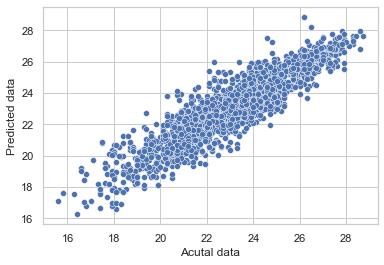

In [597]:
sns.scatterplot(x=y_test,y=predlr1)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [583]:
#Ridge

grid_para={'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True,False],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs'],'tol':[0.0001,0.001,0.01,0.1]}
grid_search=GridSearchCV(estimator=rd1,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]})

In [584]:
best_para=grid_search.best_params_
print(best_para)

{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'solver': 'sag', 'tol': 0.01}


In [585]:
rd1=Ridge(copy_X=True,fit_intercept=True,normalize=False,solver='sag',tol=0.01)
rd1.fit(x_train,y_train)
predrd1=rd1.predict(x_test)
print('R2 score :',r2_score(y_test,predrd1))
print('Mean squared error :',mean_squared_error(y_test,predrd1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrd1)))

R2 score : 0.8197429064730504
Mean squared error : 0.9428652698423847
Root Mean squared error  : 0.9710124972637503


Text(0, 0.5, 'Predicted data')

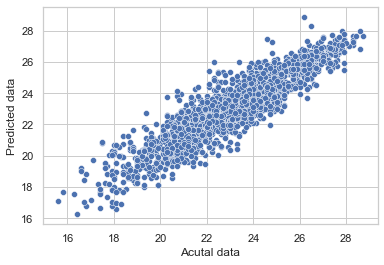

In [596]:
sns.scatterplot(x=y_test,y=predrd1)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [588]:
#Random Forest
grid_para={'criterion':['squared_error','absolute_error','poisson'],'max_samples':[1,4,7,10],'max_depth':[3,6,7,10],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rf1,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 6, 7, 10],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_samples': [1, 4, 7, 10]})

In [589]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'poisson', 'max_depth': 6, 'max_features': 'auto', 'max_samples': 10}


In [590]:
rf1=RandomForestRegressor(criterion='poisson',max_depth=6,max_features='auto',max_samples=10)
rf1.fit(x_train,y_train)
predrf1=rf1.predict(x_test)
print('R2 score :',r2_score(y_test,predrf1))
print('Mean squared error :',mean_squared_error(y_test,predrf1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf1)))

R2 score : 0.37850128166951935
Mean squared error : 3.2508543508594596
Root Mean squared error  : 1.8030125764562652


Text(0, 0.5, 'Predicted data')

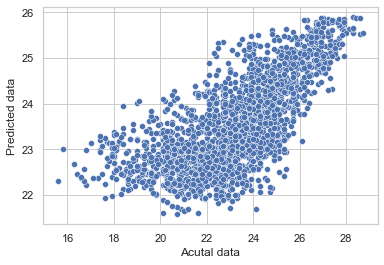

In [591]:
sns.scatterplot(x=y_test,y=predrf1)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [592]:
#GradientBoost
grid_para={'learning_rate':[0.001,0.01,0.1,1.0,1.5],'subsample':[0.1,1.0,1.5,2.0],'max_depth':[2,5,7,10],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=gb1,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'max_depth': [2, 5, 7, 10],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'subsample': [0.1, 1.0, 1.5, 2.0]})

In [593]:
best_para=grid_search.best_params_
print(best_para)

{'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'subsample': 1.0}


In [594]:
gb1=GradientBoostingRegressor(learning_rate=0.1,max_features='auto',subsample=1.0)
gb1.fit(x_train,y_train)
predgb1=gb1.predict(x_test)
print('R2 score :',r2_score(y_test,predgb1))
print('Mean squared error :',mean_squared_error(y_test,predgb1))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predgb1)))

R2 score : 0.8814859057121867
Mean squared error : 0.6199080507980047
Root Mean squared error  : 0.7873423974345626


Text(0, 0.5, 'Predicted data')

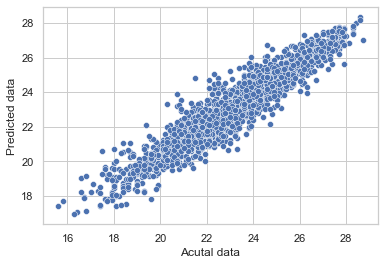

In [595]:
sns.scatterplot(x=y_test,y=predgb1)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [611]:
#linear
score=cross_val_score(lr1,x,y,cv=3)
print(score)
print(score.mean())

[0.72648372 0.76710198 0.8477858 ]
0.7804571665016274


In [609]:
#Ridge
score=cross_val_score(rd1,x,y,cv=3)
print(score)
print(score.mean())

[0.72663318 0.76630703 0.84801416]
0.7803181216633903


In [610]:
#GradientBoosting
score=cross_val_score(gb1,x,y,cv=3)
print(score)
print(score.mean())

[0.73586928 0.80012773 0.85354587]
0.7965142941034716


The Linear regression model r2 score is 82.00% and cross validation score is 78%.

The Ridge regression model r2 score is 71.97% and cross validation score is 78%.

The Gradient Boosting regression model r2 score is 88.14% and cross validation score is 79.64%.

The Gradient Boosting Model gives the best result.

In [612]:
import pickle
filename="Temp Min.pkl"
pickle.dump(gb1,open(filename, 'wb'))

Conclusion

In [613]:
model=pickle.load(open("Temp Min.pkl",'rb'))
result=model.score(x_test,y_test)
print('The R2 score of the model : ',result*100)

The R2 score of the model :  88.14859057121866


In [614]:
Accuracy=pd.DataFrame([model.predict(x_test),predgb1],index=['Predicted','Original'])
Accuracy

0         1          2          3         4          5     \
Predicted  20.443916  23.48813  22.736931  22.885541  22.83056  20.377482   
Original   20.443916  23.48813  22.736931  22.885541  22.83056  20.377482   

                6         7          8          9     ...      1968  \
Predicted  21.147648  23.38746  21.582143  25.252163  ...  23.72368   
Original   21.147648  23.38746  21.582143  25.252163  ...  23.72368   

                1969      1970       1971       1972       1973       1974  \
Predicted  23.755461  20.04791  20.024902  25.908128  23.347958  24.507507   
Original   23.755461  20.04791  20.024902  25.908128  23.347958  24.507507   

                1975       1976       1977  
Predicted  21.913925  18.631362  24.045737  
Original   21.913925  18.631362  24.045737  

[2 rows x 1978 columns]